In [1]:
import json
import os
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import seaborn as sns
import numpy as np

import matplotlib as mpl
import matplotlib.font_manager as font_manager

mpl.rcParams['font.family'] = 'serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif'] = cmfont.get_name()
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.formatter.use_mathtext'] = True

In [2]:
# Update this to the path of your saved JSON file
file_path = 'roc_auc_models_SMOTE/roc_data_XGBoost_1.0.json'

with open(file_path, 'r') as file:
    roc_data = json.load(file)

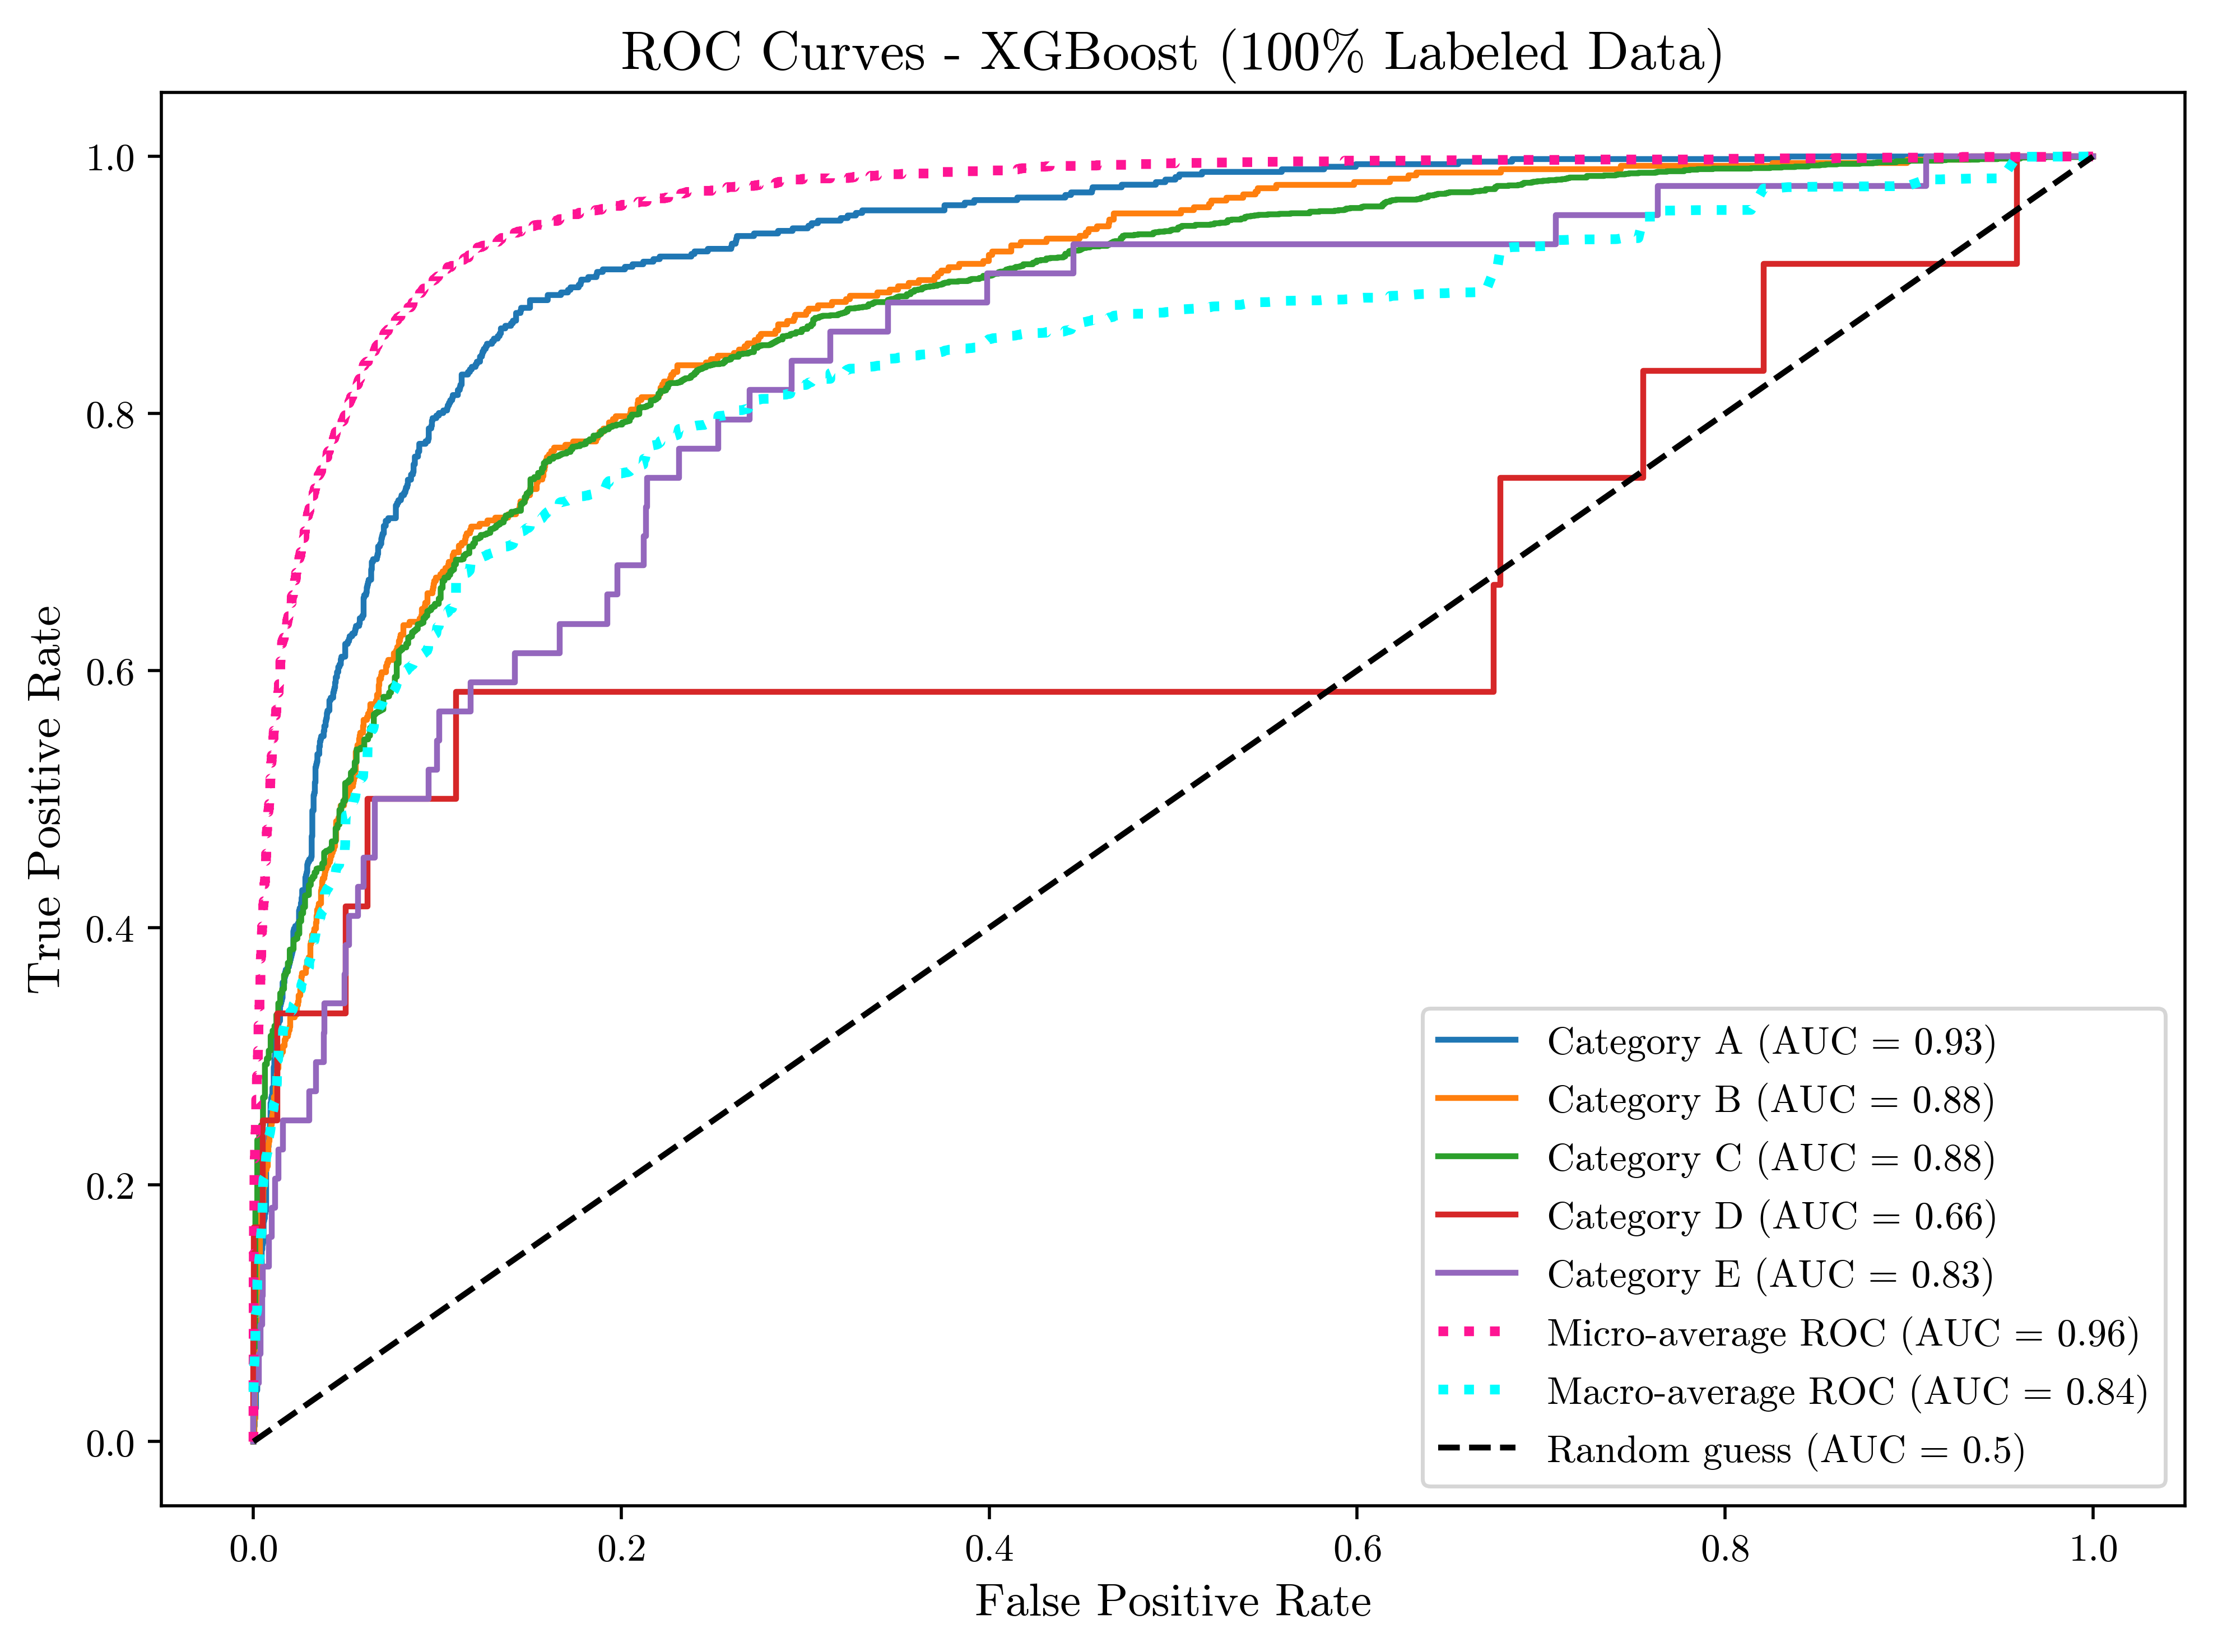

In [5]:
plt.figure(figsize=(8, 6), dpi = 500)

# Create a mapping from category indices to letters
category_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}

# Plot the ROC curve for each class (keeping the default color cycle)
for i in range(5):  # Assuming you have 5 classes
    class_letter = category_mapping[i]  # Get the corresponding letter
    plt.plot(roc_data['fpr']['test'][str(i)], roc_data['tpr']['test'][str(i)], 
             label=f'Category {class_letter} (AUC = {roc_data["roc_auc"]["test"][str(i)]:.2f})')

# Plot the micro-average ROC curve
if 'micro' in roc_data['fpr']['test']:
    plt.plot(roc_data['fpr']['test']['micro'], roc_data['tpr']['test']['micro'],
             label='Micro-average ROC (AUC = {:.2f})'.format(roc_data["roc_auc"]["test"]["micro"]),
             color='deeppink', linestyle=':', linewidth=2.5)

# Plot the macro-average ROC curve
if 'macro' in roc_data['fpr']['test']:
    plt.plot(roc_data['fpr']['test']['macro'], roc_data['tpr']['test']['macro'],
             label='Macro-average ROC (AUC = {:.2f})'.format(roc_data["roc_auc"]["test"]["macro"]),
             color='aqua', linestyle=':', linewidth=2.5)

# Plot the chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random guess (AUC = 0.5)')

# Add labels and title
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - XGBoost (100% Labeled Data)', fontsize=14)
plt.legend(loc="lower right")

plt.tight_layout()

# Show the plot
plt.show()
